# Home Credit Risk Prediction

In [338]:
# Pandas dan Numpy
import pandas as pd
import numpy as np

# Visualization Library
import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats as st

import warnings
warnings.simplefilter(action='ignore', category= FutureWarning)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

## Problem

Prediksi skor kredit

## Goal and Objective

## Metrics

## EDA

In [344]:
df = pd.read_csv('application_train.csv')

In [345]:
df.head(3)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [346]:
df.shape

(307511, 122)

In [347]:
test = pd.read_csv('application_test.csv')

In [348]:
bureau = pd.read_csv('bureau.csv')

In [349]:
balance = pd.read_csv('bureau_balance.csv')

In [350]:
pos = pd.read_csv('POS_CASH_balance.csv')

In [351]:
credit = pd.read_csv('credit_card_balance.csv')

In [352]:
previous = pd.read_csv('previous_application.csv')

In [353]:
installment = pd.read_csv('installments_payments.csv')

In [354]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [355]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48744 entries, 0 to 48743
Columns: 121 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(40), object(16)
memory usage: 45.0+ MB


In [356]:
for col in df.columns:
    print(f"Column: {col}")
    print(f"Dtype: {df[col].dtype}")
    print()

Column: SK_ID_CURR
Dtype: int64

Column: TARGET
Dtype: int64

Column: NAME_CONTRACT_TYPE
Dtype: object

Column: CODE_GENDER
Dtype: object

Column: FLAG_OWN_CAR
Dtype: object

Column: FLAG_OWN_REALTY
Dtype: object

Column: CNT_CHILDREN
Dtype: int64

Column: AMT_INCOME_TOTAL
Dtype: float64

Column: AMT_CREDIT
Dtype: float64

Column: AMT_ANNUITY
Dtype: float64

Column: AMT_GOODS_PRICE
Dtype: float64

Column: NAME_TYPE_SUITE
Dtype: object

Column: NAME_INCOME_TYPE
Dtype: object

Column: NAME_EDUCATION_TYPE
Dtype: object

Column: NAME_FAMILY_STATUS
Dtype: object

Column: NAME_HOUSING_TYPE
Dtype: object

Column: REGION_POPULATION_RELATIVE
Dtype: float64

Column: DAYS_BIRTH
Dtype: int64

Column: DAYS_EMPLOYED
Dtype: int64

Column: DAYS_REGISTRATION
Dtype: float64

Column: DAYS_ID_PUBLISH
Dtype: int64

Column: OWN_CAR_AGE
Dtype: float64

Column: FLAG_MOBIL
Dtype: int64

Column: FLAG_EMP_PHONE
Dtype: int64

Column: FLAG_WORK_PHONE
Dtype: int64

Column: FLAG_CONT_MOBILE
Dtype: int64

Column: FLA

In [357]:
# check duplicate rows
df.duplicated().sum()

0

In [358]:
# check missing values
df.isnull().sum()

SK_ID_CURR                           0
TARGET                               0
NAME_CONTRACT_TYPE                   0
CODE_GENDER                          0
FLAG_OWN_CAR                         0
FLAG_OWN_REALTY                      0
CNT_CHILDREN                         0
AMT_INCOME_TOTAL                     0
AMT_CREDIT                           0
AMT_ANNUITY                         12
AMT_GOODS_PRICE                    278
NAME_TYPE_SUITE                   1292
NAME_INCOME_TYPE                     0
NAME_EDUCATION_TYPE                  0
NAME_FAMILY_STATUS                   0
NAME_HOUSING_TYPE                    0
REGION_POPULATION_RELATIVE           0
DAYS_BIRTH                           0
DAYS_EMPLOYED                        0
DAYS_REGISTRATION                    0
DAYS_ID_PUBLISH                      0
OWN_CAR_AGE                     202929
FLAG_MOBIL                           0
FLAG_EMP_PHONE                       0
FLAG_WORK_PHONE                      0
FLAG_CONT_MOBILE         

In [359]:
df['NAME_FAMILY_STATUS'].unique()

array(['Single / not married', 'Married', 'Civil marriage', 'Widow',
       'Separated', 'Unknown'], dtype=object)

In [360]:
df['ORGANIZATION_TYPE'].unique()

array(['Business Entity Type 3', 'School', 'Government', 'Religion',
       'Other', 'XNA', 'Electricity', 'Medicine',
       'Business Entity Type 2', 'Self-employed', 'Transport: type 2',
       'Construction', 'Housing', 'Kindergarten', 'Trade: type 7',
       'Industry: type 11', 'Military', 'Services', 'Security Ministries',
       'Transport: type 4', 'Industry: type 1', 'Emergency', 'Security',
       'Trade: type 2', 'University', 'Transport: type 3', 'Police',
       'Business Entity Type 1', 'Postal', 'Industry: type 4',
       'Agriculture', 'Restaurant', 'Culture', 'Hotel',
       'Industry: type 7', 'Trade: type 3', 'Industry: type 3', 'Bank',
       'Industry: type 9', 'Insurance', 'Trade: type 6',
       'Industry: type 2', 'Transport: type 1', 'Industry: type 12',
       'Mobile', 'Trade: type 1', 'Industry: type 5', 'Industry: type 10',
       'Legal Services', 'Advertising', 'Trade: type 5', 'Cleaning',
       'Industry: type 13', 'Trade: type 4', 'Telecom',
       'I

In [361]:
df['CODE_GENDER'].unique()

array(['M', 'F', 'XNA'], dtype=object)

## Data Cleaning

More than 50% missing values: OWN_CAR_AGE,
APARTMENTS_AVG
BASEMENTAREA_AVG
YEARS_BEGINEXPLUATATION_AVG
YEARS_BUILD_AVG
COMMONAREA_AVG
ELEVATORS_AVG
ENTRANCES_AVG
FLOORSMAX_AVG
FLOORSMIN_AVG
LANDAREA_AVG
LIVINGAPARTMENTS_AVG
LIVINGAREA_AVG
NONLIVINGAPARTMENTS_AVG
NONLIVINGAREA_AVG
APARTMENTS_MODE
BASEMENTAREA_MODE
YEARS_BEGINEXPLUATATION_MODE
YEARS_BUILD_MODE
COMMONAREA_MODE
ELEVATORS_MODE
ENTRANCES_MODE
FLOORSMAX_MODE
FLOORSMIN_MODE
LANDAREA_MODE
LIVINGAPARTMENTS_MODE
LIVINGAREA_MODE
NONLIVINGAPARTMENTS_MODE
NONLIVINGAREA_MODE
APARTMENTS_MEDI
BASEMENTAREA_MEDI
YEARS_BEGINEXPLUATATION_MEDI
YEARS_BUILD_MEDI
COMMONAREA_MEDI
ELEVATORS_MEDI
ENTRANCES_MEDI
FLOORSMAX_MEDI
FLOORSMIN_MEDI
LANDAREA_MEDI
LIVINGAPARTMENTS_MEDI
LIVINGAREA_MEDI
NONLIVINGAPARTMENTS_MEDI
NONLIVINGAREA_MEDI
FONDKAPREMONT_MODE
HOUSETYPE_MODE
TOTALAREA_MODE
WALLSMATERIAL_MODE
EMERGENCYSTATE_MODE

Not relevant: 
FLAG_MOBIL
FLAG_EMP_PHONE
FLAG_WORK_PHONE
FLAG_CONT_MOBILE
FLAG_PHONE
FLAG_EMAIL
WEEKDAY_APPR_PROCESS_START
HOUR_APPR_PROCESS_START
REG_REGION_NOT_LIVE_REGION
REG_REGION_NOT_WORK_REGION
LIVE_REGION_NOT_WORK_REGION
REG_CITY_NOT_LIVE_CITY
REG_CITY_NOT_WORK_CITY
LIVE_CITY_NOT_WORK_CITY
REGION_POPULATION_RELATIVE
DAYS_REGISTRATION

In [364]:
df.drop(['OWN_CAR_AGE', 
         'APARTMENTS_AVG',
'BASEMENTAREA_AVG',
'YEARS_BEGINEXPLUATATION_AVG',
'YEARS_BUILD_AVG',
'COMMONAREA_AVG',
'ELEVATORS_AVG',
'ENTRANCES_AVG',
'FLOORSMAX_AVG',
'FLOORSMIN_AVG',
'LANDAREA_AVG',
'LIVINGAPARTMENTS_AVG',
'LIVINGAREA_AVG',
'NONLIVINGAPARTMENTS_AVG',
'NONLIVINGAREA_AVG',
'APARTMENTS_MODE',
'BASEMENTAREA_MODE',
'YEARS_BEGINEXPLUATATION_MODE',
'YEARS_BUILD_MODE',
'COMMONAREA_MODE',
'ELEVATORS_MODE',
'ENTRANCES_MODE',
'FLOORSMAX_MODE',
'FLOORSMIN_MODE',
'LANDAREA_MODE',
'LIVINGAPARTMENTS_MODE',
'LIVINGAREA_MODE',
'NONLIVINGAPARTMENTS_MODE',
'NONLIVINGAREA_MODE',
'APARTMENTS_MEDI',
'BASEMENTAREA_MEDI',
'YEARS_BEGINEXPLUATATION_MEDI',
'YEARS_BUILD_MEDI',
'COMMONAREA_MEDI',
'ELEVATORS_MEDI',
'ENTRANCES_MEDI',
'FLOORSMAX_MEDI',
'FLOORSMIN_MEDI',
'LANDAREA_MEDI',
'LIVINGAPARTMENTS_MEDI',
'LIVINGAREA_MEDI',
'NONLIVINGAPARTMENTS_MEDI',
'NONLIVINGAREA_MEDI',
'FONDKAPREMONT_MODE',
'HOUSETYPE_MODE',
'TOTALAREA_MODE',
'WALLSMATERIAL_MODE',
'EMERGENCYSTATE_MODE', 
'FLAG_MOBIL',
'FLAG_EMP_PHONE',
'FLAG_WORK_PHONE',
'FLAG_CONT_MOBILE',
'FLAG_PHONE',
'FLAG_EMAIL',
'WEEKDAY_APPR_PROCESS_START',
'HOUR_APPR_PROCESS_START',
'REG_REGION_NOT_LIVE_REGION',
'REG_REGION_NOT_WORK_REGION',
'LIVE_REGION_NOT_WORK_REGION',
'REG_CITY_NOT_LIVE_CITY',
'REG_CITY_NOT_WORK_CITY',
'LIVE_CITY_NOT_WORK_CITY',
'REGION_POPULATION_RELATIVE',
'DAYS_REGISTRATION'], axis=1, inplace=True)

In [365]:
test.drop(['OWN_CAR_AGE', 
         'APARTMENTS_AVG',
'BASEMENTAREA_AVG',
'YEARS_BEGINEXPLUATATION_AVG',
'YEARS_BUILD_AVG',
'COMMONAREA_AVG',
'ELEVATORS_AVG',
'ENTRANCES_AVG',
'FLOORSMAX_AVG',
'FLOORSMIN_AVG',
'LANDAREA_AVG',
'LIVINGAPARTMENTS_AVG',
'LIVINGAREA_AVG',
'NONLIVINGAPARTMENTS_AVG',
'NONLIVINGAREA_AVG',
'APARTMENTS_MODE',
'BASEMENTAREA_MODE',
'YEARS_BEGINEXPLUATATION_MODE',
'YEARS_BUILD_MODE',
'COMMONAREA_MODE',
'ELEVATORS_MODE',
'ENTRANCES_MODE',
'FLOORSMAX_MODE',
'FLOORSMIN_MODE',
'LANDAREA_MODE',
'LIVINGAPARTMENTS_MODE',
'LIVINGAREA_MODE',
'NONLIVINGAPARTMENTS_MODE',
'NONLIVINGAREA_MODE',
'APARTMENTS_MEDI',
'BASEMENTAREA_MEDI',
'YEARS_BEGINEXPLUATATION_MEDI',
'YEARS_BUILD_MEDI',
'COMMONAREA_MEDI',
'ELEVATORS_MEDI',
'ENTRANCES_MEDI',
'FLOORSMAX_MEDI',
'FLOORSMIN_MEDI',
'LANDAREA_MEDI',
'LIVINGAPARTMENTS_MEDI',
'LIVINGAREA_MEDI',
'NONLIVINGAPARTMENTS_MEDI',
'NONLIVINGAREA_MEDI',
'FONDKAPREMONT_MODE',
'HOUSETYPE_MODE',
'TOTALAREA_MODE',
'WALLSMATERIAL_MODE',
'EMERGENCYSTATE_MODE', 
'FLAG_MOBIL',
'FLAG_EMP_PHONE',
'FLAG_WORK_PHONE',
'FLAG_CONT_MOBILE',
'FLAG_PHONE',
'FLAG_EMAIL',
'WEEKDAY_APPR_PROCESS_START',
'HOUR_APPR_PROCESS_START',
'REG_REGION_NOT_LIVE_REGION',
'REG_REGION_NOT_WORK_REGION',
'LIVE_REGION_NOT_WORK_REGION',
'REG_CITY_NOT_LIVE_CITY',
'REG_CITY_NOT_WORK_CITY',
'LIVE_CITY_NOT_WORK_CITY',
'REGION_POPULATION_RELATIVE',
'DAYS_REGISTRATION'], axis=1, inplace=True)

## Data Preprocessing

### Feature Encoding

In [368]:
# Label encoding
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [369]:
df['NAME_CONTRACT_TYPE']=le.fit_transform(df['NAME_CONTRACT_TYPE'])
df['FLAG_OWN_CAR']=le.fit_transform(df['FLAG_OWN_CAR'])
df['FLAG_OWN_REALTY']=le.fit_transform(df['FLAG_OWN_REALTY'])

In [370]:
test['NAME_CONTRACT_TYPE']=le.fit_transform(test['NAME_CONTRACT_TYPE'])
test['FLAG_OWN_CAR']=le.fit_transform(test['FLAG_OWN_CAR'])
test['FLAG_OWN_REALTY']=le.fit_transform(test['FLAG_OWN_REALTY'])

In [371]:
# One-hot encoding
dummy_gender = pd.get_dummies(df['CODE_GENDER'], prefix='GENDER', dtype=int)
dummy_car = pd.get_dummies(df['FLAG_OWN_CAR'], prefix='CAR', dtype=int)
dummy_realty = pd.get_dummies(df['FLAG_OWN_REALTY'], prefix='REALTY', dtype=int)
dummy_suite = pd.get_dummies(df['NAME_TYPE_SUITE'], prefix='SUITE', dtype=int)
dummy_income = pd.get_dummies(df['NAME_INCOME_TYPE'], prefix='INCOME', dtype=int)
dummy_education = pd.get_dummies(df['NAME_EDUCATION_TYPE'], prefix='EDUCATION', dtype=int)
dummy_family = pd.get_dummies(df['NAME_FAMILY_STATUS'], prefix='FAMILY', dtype=int)
dummy_housing = pd.get_dummies(df['NAME_HOUSING_TYPE'], prefix='HOUSING', dtype=int)
dummy_occupation = pd.get_dummies(df['OCCUPATION_TYPE'], prefix='OCCUPATION', dtype=int)
dummy_org = pd.get_dummies(df['ORGANIZATION_TYPE'], prefix='ORG', dtype=int)

df = pd.concat([df, dummy_gender, dummy_car, dummy_realty, dummy_suite, dummy_income, dummy_education,
               dummy_family, dummy_housing, dummy_occupation, dummy_org], axis=1)

In [372]:
df.drop(['CODE_GENDER','FLAG_OWN_CAR','FLAG_OWN_REALTY','NAME_TYPE_SUITE','NAME_INCOME_TYPE',
        'NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS','NAME_HOUSING_TYPE','OCCUPATION_TYPE',
        'ORGANIZATION_TYPE'], axis=1, inplace=True)

In [373]:
dummy_gender = pd.get_dummies(test['CODE_GENDER'], prefix='GENDER', dtype=int)
dummy_car = pd.get_dummies(test['FLAG_OWN_CAR'], prefix='CAR', dtype=int)
dummy_realty = pd.get_dummies(test['FLAG_OWN_REALTY'], prefix='REALTY', dtype=int)
dummy_suite = pd.get_dummies(test['NAME_TYPE_SUITE'], prefix='SUITE', dtype=int)
dummy_income = pd.get_dummies(test['NAME_INCOME_TYPE'], prefix='INCOME', dtype=int)
dummy_education = pd.get_dummies(test['NAME_EDUCATION_TYPE'], prefix='EDUCATION', dtype=int)
dummy_family = pd.get_dummies(test['NAME_FAMILY_STATUS'], prefix='FAMILY', dtype=int)
dummy_housing = pd.get_dummies(test['NAME_HOUSING_TYPE'], prefix='HOUSING', dtype=int)
dummy_occupation = pd.get_dummies(test['OCCUPATION_TYPE'], prefix='OCCUPATION', dtype=int)
dummy_org = pd.get_dummies(test['ORGANIZATION_TYPE'], prefix='ORG', dtype=int)

test = pd.concat([test, dummy_gender, dummy_car, dummy_realty, dummy_suite, dummy_income, dummy_education,
               dummy_family, dummy_housing, dummy_occupation, dummy_org], axis=1)

In [374]:
# check columns
df.shape

(307511, 163)

In [375]:
test.shape

(48744, 169)

In [376]:
# delete columns that are not in both train & test data
train_labels = df['TARGET']

df, test = df.align(test, join = 'inner', axis = 1)

df['TARGET'] = train_labels

In [377]:
train_labels = df['TARGET']

test, df = test.align(df, join = 'inner', axis = 1)

df['TARGET'] = train_labels

In [378]:
df.shape

(307511, 160)

In [379]:
test.shape

(48744, 159)

### Correlation

In [381]:
numerical = df.select_dtypes(exclude='object')

In [382]:
corr = numerical.corr()['TARGET'].sort_values()

In [383]:
corr.tail(10)

FLAG_DOCUMENT_3                            0.044346
EDUCATION_Secondary / secondary special    0.049824
DAYS_ID_PUBLISH                            0.051457
GENDER_M                                   0.054713
DAYS_LAST_PHONE_CHANGE                     0.055218
INCOME_Working                             0.057481
REGION_RATING_CLIENT                       0.058899
REGION_RATING_CLIENT_W_CITY                0.060893
DAYS_BIRTH                                 0.078239
TARGET                                     1.000000
Name: TARGET, dtype: float64

In [384]:
corr.head(10)

EXT_SOURCE_3                 -0.178919
EXT_SOURCE_2                 -0.160472
EXT_SOURCE_1                 -0.155317
EDUCATION_Higher education   -0.056593
GENDER_F                     -0.054704
INCOME_Pensioner             -0.046209
ORG_XNA                      -0.045987
DAYS_EMPLOYED                -0.044932
AMT_GOODS_PRICE              -0.039645
NAME_CONTRACT_TYPE           -0.030896
Name: TARGET, dtype: float64

### Handle missing values

AMT_ANNUITY                         12
AMT_GOODS_PRICE                    278
NAME_TYPE_SUITE                   1292
OCCUPATION_TYPE                  96391
CNT_FAM_MEMBERS                      2
EXT_SOURCE_1                    173378
EXT_SOURCE_2                       660
EXT_SOURCE_3                     60965
OBS_30_CNT_SOCIAL_CIRCLE          1021
DEF_30_CNT_SOCIAL_CIRCLE          1021
OBS_60_CNT_SOCIAL_CIRCLE          1021
DEF_60_CNT_SOCIAL_CIRCLE          1021
DAYS_LAST_PHONE_CHANGE               1
AMT_REQ_CREDIT_BUREAU_HOUR       41519
AMT_REQ_CREDIT_BUREAU_DAY        41519
AMT_REQ_CREDIT_BUREAU_WEEK       41519
AMT_REQ_CREDIT_BUREAU_MON        41519
AMT_REQ_CREDIT_BUREAU_QRT        41519
AMT_REQ_CREDIT_BUREAU_YEAR       41519

In [387]:
from sklearn.impute import SimpleImputer

In [388]:
imputer = SimpleImputer(strategy='median')

In [389]:
imputer.fit(df)

SimpleImputer(strategy='median')

In [390]:
df = pd.DataFrame(imputer.transform(df), columns=df.columns)

In [391]:
df.isnull().sum()

SK_ID_CURR                                 0
NAME_CONTRACT_TYPE                         0
CNT_CHILDREN                               0
AMT_INCOME_TOTAL                           0
AMT_CREDIT                                 0
AMT_ANNUITY                                0
AMT_GOODS_PRICE                            0
DAYS_BIRTH                                 0
DAYS_EMPLOYED                              0
DAYS_ID_PUBLISH                            0
CNT_FAM_MEMBERS                            0
REGION_RATING_CLIENT                       0
REGION_RATING_CLIENT_W_CITY                0
EXT_SOURCE_1                               0
EXT_SOURCE_2                               0
EXT_SOURCE_3                               0
OBS_30_CNT_SOCIAL_CIRCLE                   0
DEF_30_CNT_SOCIAL_CIRCLE                   0
OBS_60_CNT_SOCIAL_CIRCLE                   0
DEF_60_CNT_SOCIAL_CIRCLE                   0
DAYS_LAST_PHONE_CHANGE                     0
FLAG_DOCUMENT_2                            0
FLAG_DOCUM

In [392]:
imputer.fit(test)

SimpleImputer(strategy='median')

In [393]:
test = pd.DataFrame(imputer.transform(test), columns=test.columns)

In [394]:
test.isnull().sum()

SK_ID_CURR                                 0
NAME_CONTRACT_TYPE                         0
CNT_CHILDREN                               0
AMT_INCOME_TOTAL                           0
AMT_CREDIT                                 0
AMT_ANNUITY                                0
AMT_GOODS_PRICE                            0
DAYS_BIRTH                                 0
DAYS_EMPLOYED                              0
DAYS_ID_PUBLISH                            0
CNT_FAM_MEMBERS                            0
REGION_RATING_CLIENT                       0
REGION_RATING_CLIENT_W_CITY                0
EXT_SOURCE_1                               0
EXT_SOURCE_2                               0
EXT_SOURCE_3                               0
OBS_30_CNT_SOCIAL_CIRCLE                   0
DEF_30_CNT_SOCIAL_CIRCLE                   0
OBS_60_CNT_SOCIAL_CIRCLE                   0
DEF_60_CNT_SOCIAL_CIRCLE                   0
DAYS_LAST_PHONE_CHANGE                     0
FLAG_DOCUMENT_2                            0
FLAG_DOCUM

### Feature scaling

In [396]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [397]:
scaler = StandardScaler()

In [398]:
train_label = df['TARGET']

In [447]:
df = df.drop(columns=['TARGET'])

In [449]:
df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

In [451]:
df['TARGET'] = train_label

In [453]:
test = pd.DataFrame(scaler.fit_transform(test), columns=test.columns)

### Imbalance Resampling

In [455]:
X_train = df.drop(columns=['TARGET'])
y_train = df['TARGET']

In [457]:
# before resampling
y_train.value_counts()

TARGET
0.0    282686
1.0     24825
Name: count, dtype: int64

In [461]:
from imblearn.over_sampling import SMOTE

In [464]:
smote = SMOTE()
X_train, y_train = smote.fit_resample(X_train, y_train)

In [466]:
# after resampling
y_train.value_counts()

TARGET
1.0    282686
0.0    282686
Name: count, dtype: int64

## Training

In [472]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [476]:
lr = LogisticRegression(max_iter=400)
lr.fit(X_train, y_train)

LogisticRegression(max_iter=400)

In [479]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [482]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

## Testing

In [485]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
from sklearn.model_selection import cross_validate

In [504]:
def eval_classification(model):
    y_pred_train = model.predict(X_train)
    y_pred = model.predict(test)
    y_pred_proba_train = model.predict_proba(X_train)
    y_pred_proba = model.predict_proba(test)

    # Generate predicted probabilities of positive class for training and test sets
    train_probabilities = model.predict_proba(X_train)[:, 1]

    print(f"{model}")
    print("AUC (Train): %.4f" % roc_auc_score(y_train, y_pred_proba_train[:, 1]))

In [506]:
eval_classification(lr)

LogisticRegression(max_iter=400)
AUC (Train): 0.7674


In [523]:
from sklearn.model_selection import RandomizedSearchCV

In [532]:
penalty = ['l2']
solver = ['lbfgs']
hyperparameters = dict(penalty=penalty, solver=solver)

rs = RandomizedSearchCV(lr, hyperparameters, scoring='roc_auc', random_state=99, cv=2, n_iter=5)
rs.fit(X_train, y_train)
eval_classification(rs)

C:\Users\athiy\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:305: UserWarning: The total space of parameters 1 is smaller than n_iter=5. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


RandomizedSearchCV(cv=2, estimator=LogisticRegression(max_iter=400), n_iter=5,
                   param_distributions={'penalty': ['l2'], 'solver': ['lbfgs']},
                   random_state=99, scoring='roc_auc')
AUC (Train): 0.7674


In [534]:
# Feature importance for Logistic Regression
feature_names = X_train.columns
coefficient = rs.best_estimator_.coef_[0]

In [537]:
feature_importance = pd.DataFrame({'Feature Name': feature_names, 'Coefficient': coefficient})

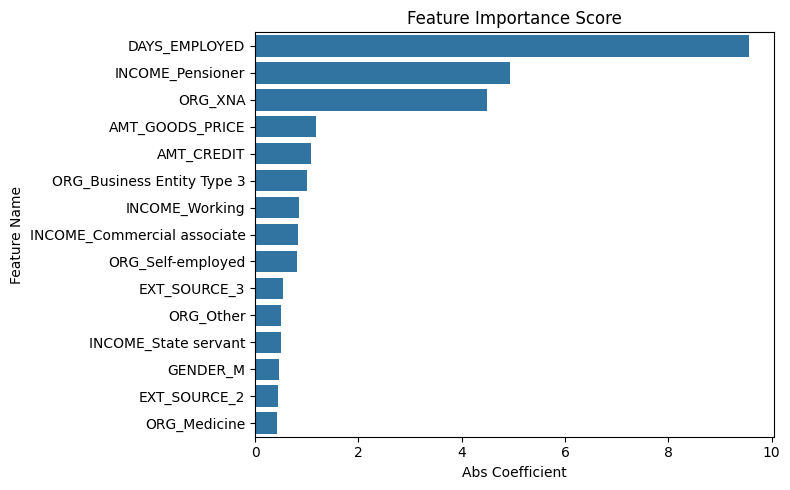

In [547]:
feature_importance['Abs Coefficient'] = feature_importance['Coefficient'].abs()
feature_importance_sort = feature_importance.sort_values(by='Abs Coefficient', ascending=False).head(15)

plt.figure(figsize=(8, 5))
sns.barplot(x='Abs Coefficient', y='Feature Name', data=feature_importance_sort, dodge=False)
plt.title('Feature Importance Score')
plt.tight_layout()

In [550]:
eval_classification(dt)

DecisionTreeClassifier()
AUC (Train): 1.0000


In [558]:
def show_feature_importance(model):
    feat_importances = pd.Series(model.feature_importances_, index=X_train.columns)
    ax = feat_importances.nlargest(15).plot(kind='barh', figsize=(10, 8))
    ax.invert_yaxis()

    plt.xlabel('score')
    plt.ylabel('feature')
    plt.title('Feature Importance Score')

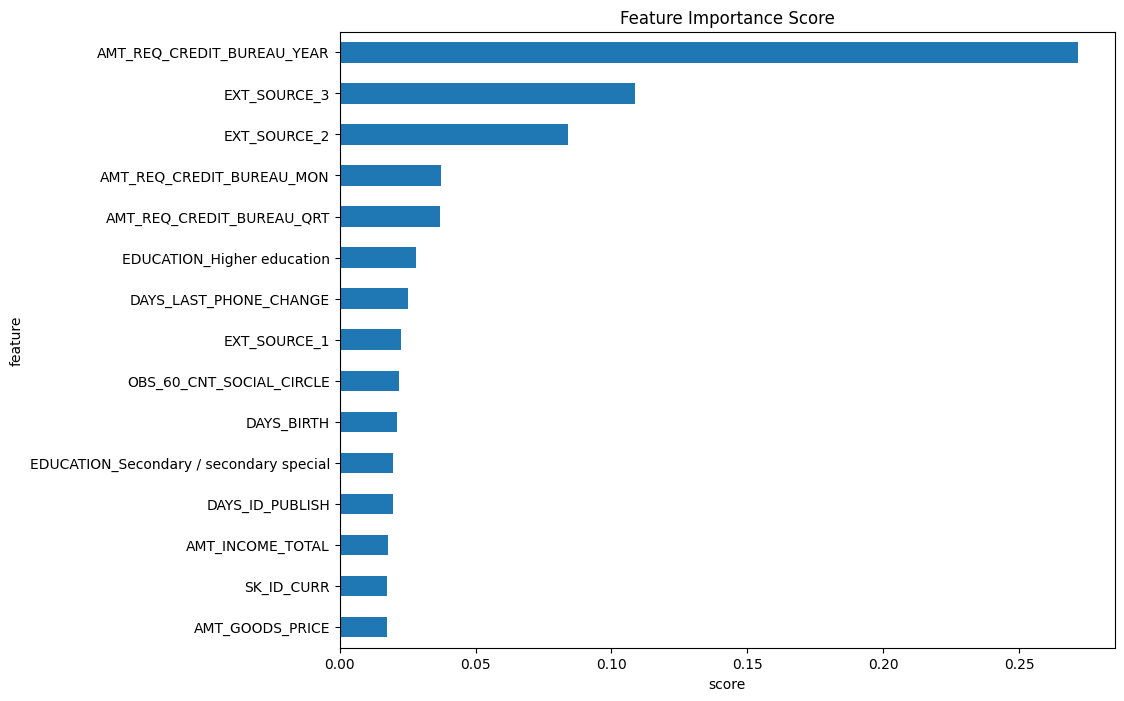

In [560]:
show_feature_importance(dt)

In [564]:
eval_classification(rf)

RandomForestClassifier()
AUC (Train): 1.0000


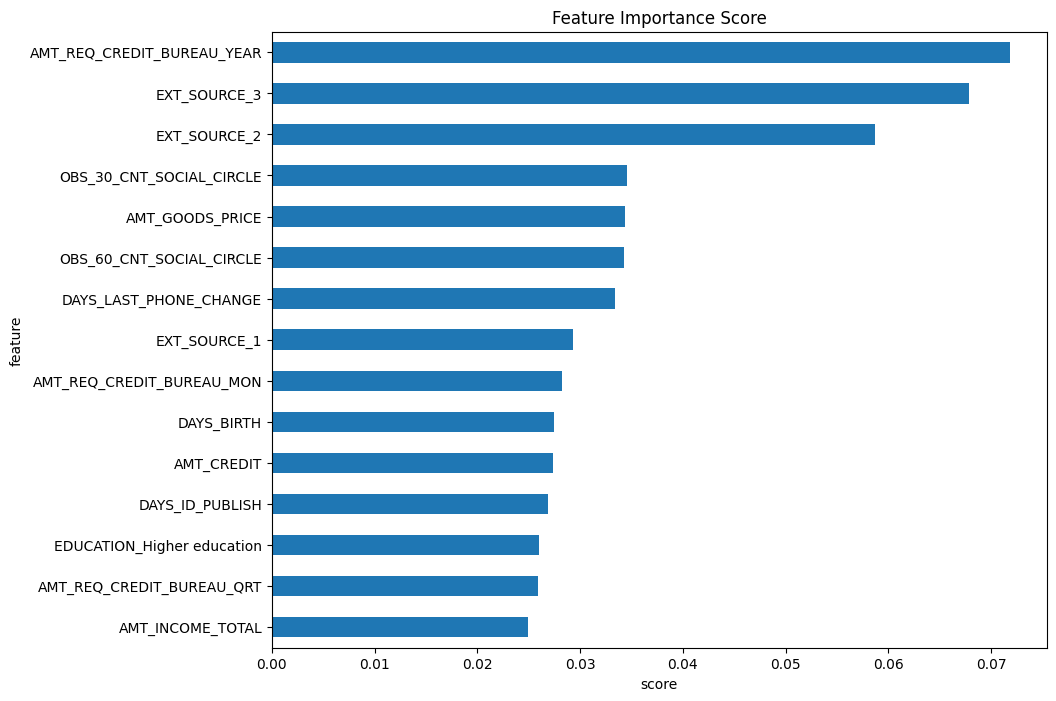

In [568]:
show_feature_importance(rf)